In [ ]:
#Installing Pycaret
# !pip install pycaret[full] --ignore-installed
!pip install pycaret
!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.23 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


**Employee_Future_Prediction_EDA**

Abstract:

Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

Nowadays, for better opportunities, employees are eager to move from one organization to another. But if they quit their jobs unexpectedly, it can result in a huge loss for the organization. A new hire will consume money and time, and newly hired employees will also take time to make the respective organization profitable.

Retaining skilled and hardworking employees is one of the most critical challenges many organizations face. Therefore, by improving employee satisfaction and providing a desirable working environment, we can certainly reduce this problem significantly.

Questions:
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

# Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats #stats library
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization

import warnings #ignore warnings
warnings.filterwarnings('ignore')

# Reading Data

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Employee.csv to Employee (2).csv


In [ ]:
employee_fut = pd.read_csv("/content/Employee.csv")

# Data Profile

In [ ]:
employee_fut.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# Describing Data set

In [ ]:
employee_fut.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# DataTypes

In [ ]:
#DataTypes
employee_fut.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Both numerical and categorial data types are present in the data set.

In [ ]:
#Missing_Values
employee_fut.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
employee_fut.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
employee_fut.Education.isna().sum()

0

In [ ]:
employee_fut.Education

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

In [ ]:
employee_fut = pd.get_dummies(employee_fut)

In [ ]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          uint8
Education_Masters            uint8
Education_PHD                uint8
City_Bangalore               uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Female                uint8
Gender_Male                  uint8
EverBenched_No               uint8
EverBenched_Yes              uint8
dtype: object

Changing data type from uint to int

In [ ]:
#changing data type from uint to int:
employee_fut['Education_Bachelors']=employee_fut['Education_Bachelors'].astype(int)
employee_fut['Education_Masters']=employee_fut['Education_Masters'].astype(int)
employee_fut['Education_PHD']=employee_fut['Education_PHD'].astype(int)
employee_fut['City_Bangalore']=employee_fut['City_Bangalore'].astype(int)
employee_fut['City_New Delhi']=employee_fut['City_New Delhi'].astype(int)
employee_fut['City_Pune']=employee_fut['City_Pune'].astype(int)
employee_fut['EverBenched_No']=employee_fut['EverBenched_No'].astype(int)
employee_fut['EverBenched_Yes']=employee_fut['EverBenched_Yes'].astype(int)
employee_fut['Gender_Male']=employee_fut['Gender_Male'].astype(int)
employee_fut['Gender_Female']=employee_fut['Gender_Female'].astype(int)

In [ ]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          int64
Education_Masters            int64
Education_PHD                int64
City_Bangalore               int64
City_New Delhi               int64
City_Pune                    int64
Gender_Female                int64
Gender_Male                  int64
EverBenched_No               int64
EverBenched_Yes              int64
dtype: object

In [ ]:
employee_fut_new= employee_fut.copy()

# Analyzing the Numeric Features

<Figure size 576x360 with 0 Axes>

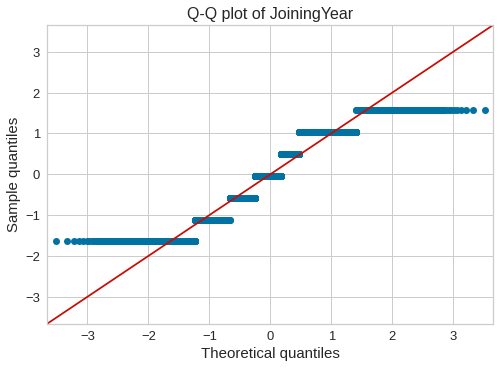

<Figure size 576x360 with 0 Axes>

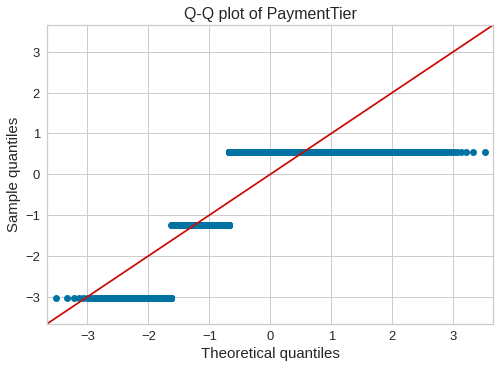

<Figure size 576x360 with 0 Axes>

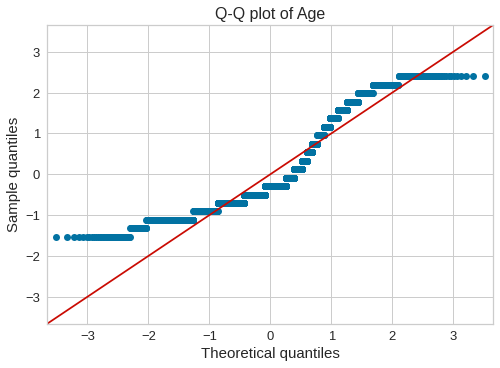

<Figure size 576x360 with 0 Axes>

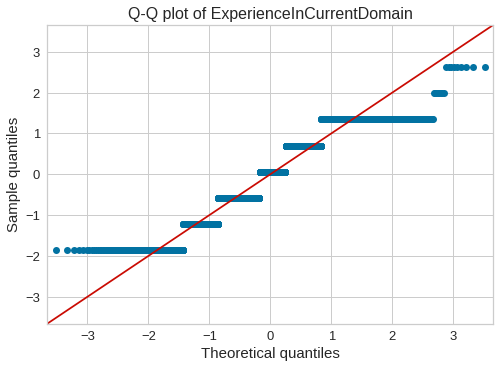

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=employee_fut[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# Outliers

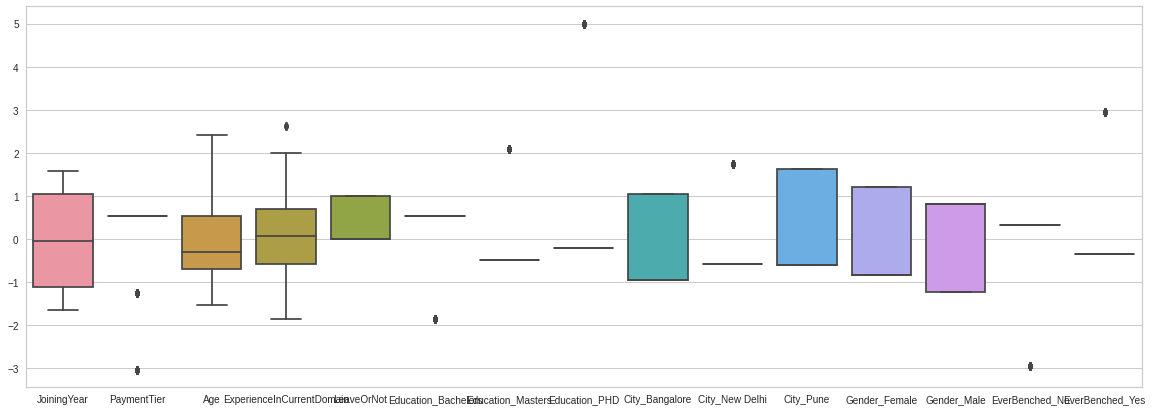

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Normalization
employee_fut_new['JoiningYear'] = scaler.fit_transform(employee_fut_new[['JoiningYear']])
employee_fut_new['PaymentTier'] = scaler.fit_transform(employee_fut_new[['PaymentTier']])
employee_fut_new['Age'] = scaler.fit_transform(employee_fut_new[['Age']])
employee_fut_new['ExperienceInCurrentDomain'] = scaler.fit_transform(employee_fut_new[['ExperienceInCurrentDomain']])
employee_fut_new['Education_Bachelors'] = scaler.fit_transform(employee_fut_new[['Education_Bachelors']])
employee_fut_new['Education_Masters'] = scaler.fit_transform(employee_fut_new[['Education_Masters']])
employee_fut_new['Education_PHD'] = scaler.fit_transform(employee_fut_new[['Education_PHD']])
employee_fut_new['City_Bangalore'] = scaler.fit_transform(employee_fut_new[['City_Bangalore']])
employee_fut_new['City_New Delhi'] = scaler.fit_transform(employee_fut_new[['City_New Delhi']])
employee_fut_new['City_Pune'] = scaler.fit_transform(employee_fut_new[['City_Pune']])
employee_fut_new['Gender_Female'] = scaler.fit_transform(employee_fut_new[['Gender_Female']])
employee_fut_new['Gender_Male'] = scaler.fit_transform(employee_fut_new[['Gender_Male']])
employee_fut_new['EverBenched_No'] = scaler.fit_transform(employee_fut_new[['EverBenched_No']])
employee_fut_new['EverBenched_Yes'] = scaler.fit_transform(employee_fut_new[['EverBenched_Yes']])

plt.figure(figsize=(20,7))
sns.boxplot(data=employee_fut_new)


# Multicolinearity

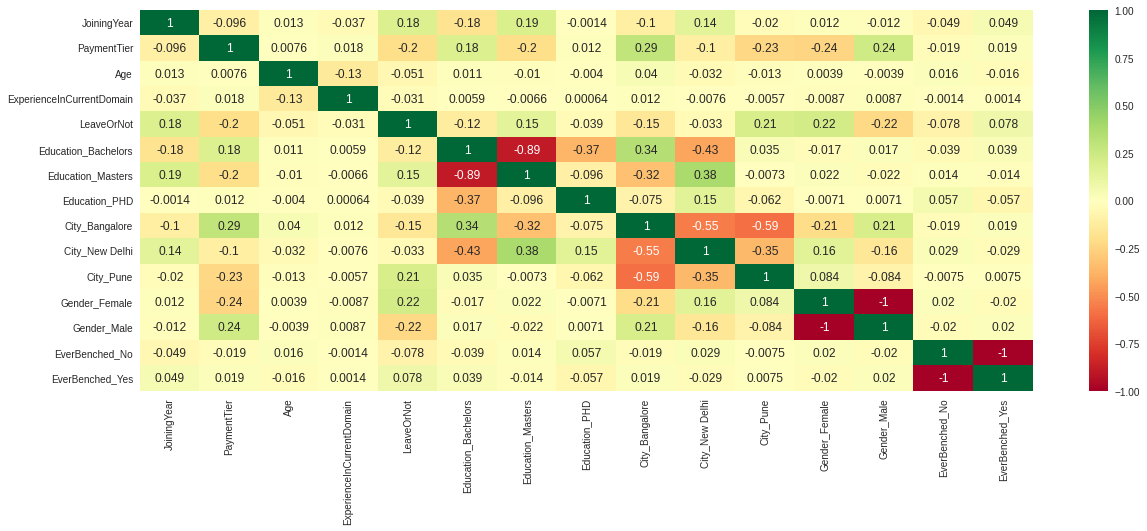

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(employee_fut.corr(), annot=True, cmap='RdYlGn')

# Binary Classification


Target Label - LeaveOrNot Here we need to know: “Is this employee going to leave us?” Yes or No?

In [ ]:
#importing classification
from pycaret.classification import *


In [ ]:
employee_fut

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1,0,0,1,0,0,1,0,1,0
4649,2013,2,37,2,1,0,1,0,0,0,1,0,1,1,0
4650,2018,3,27,5,1,0,1,0,0,1,0,0,1,1,0
4651,2012,3,30,2,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
leave_mapping = { 1 : 'Leave', 0 : 'Not'}
employee_fut['LeaveOrNot'] =  employee_fut['LeaveOrNot'].map(leave_mapping)

# Setting up the Classifier

In [ ]:
clf1 = setup(data = employee_fut, 
             target = 'LeaveOrNot',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,6386
1,Target,LeaveOrNot
2,Target Type,Binary
3,Label Encoded,"Leave: 0, Not: 1"
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='LeaveOrNot', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='LeaveOrNot')),
                ('fix_perfect', Remove_100(target='LeaveOrNot')),
                ('clean_names', Clean_Colum_Names()

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8293,0.8352,0.9234,0.8382,0.8787,0.5930,0.6011,0.370
gbc,Gradient Boosting Classifier,0.8192,0.8300,0.9083,0.8358,0.8705,0.5725,0.5779,0.544
rf,Random Forest Classifier,0.8152,0.8201,0.8972,0.8381,0.8665,0.5670,0.5710,0.922
et,Extra Trees Classifier,0.8029,0.8010,0.8752,0.8376,0.8558,0.5445,0.5465,0.936
svm,SVM - Linear Kernel,0.7878,0.0000,0.8693,0.8238,0.8454,0.5073,0.5114,0.120
ada,Ada Boost Classifier,0.7863,0.7956,0.8748,0.8185,0.8456,0.4998,0.5032,0.312
ridge,Ridge Classifier,0.7820,0.0000,0.8514,0.8278,0.8394,0.5003,0.5008,0.092
lda,Linear Discriminant Analysis,0.7817,0.8013,0.8509,0.8278,0.8392,0.4997,0.5002,0.126
dt,Decision Tree Classifier,0.7795,0.7687,0.8353,0.8353,0.8352,0.5023,0.5027,0.114
lr,Logistic Regression,0.7786,0.8041,0.8372,0.8329,0.8350,0.4987,0.4988,0.942


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6386, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................



# Creating a model
We will use Light GBM model here, as it is performs well and is computationally inexpensive and quick.

In [ ]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8175,0.8429,0.9243,0.8241,0.8714,0.5609,0.5719
1,0.8267,0.8350,0.9266,0.8330,0.8773,0.5851,0.5948
2,0.8464,0.8347,0.9220,0.8590,0.8894,0.6392,0.6435
3,0.8218,0.8220,0.9151,0.8347,0.8731,0.5762,0.5831
4,0.8341,0.8414,0.9289,0.8402,0.8824,0.6035,0.6123
Mean,0.8293,0.8352,0.9234,0.8382,0.8787,0.5930,0.6011
Std,0.0102,0.0074,0.0047,0.0116,0.0066,0.0269,0.0250


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6386, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


# Hyperparameter Tuning

In [ ]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8298,0.8609,0.9197,0.8407,0.8784,0.5964,0.6032
1,0.8374,0.8300,0.9289,0.8438,0.8843,0.6132,0.6213
2,0.8418,0.8515,0.9060,0.8643,0.8847,0.6333,0.6350
3,0.8172,0.8249,0.9174,0.8282,0.8705,0.5626,0.5711
4,0.8341,0.8335,0.9243,0.8431,0.8818,0.6055,0.6127
Mean,0.8321,0.8402,0.9193,0.8440,0.8799,0.6022,0.6087
Std,0.0084,0.0137,0.0077,0.0116,0.0052,0.0232,0.0215


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=76, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=170, n_jobs=-1, num_leaves=10, objective=None,
               random_state=6386, reg_alpha=0.3, reg_lambda=0.005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


Observation:

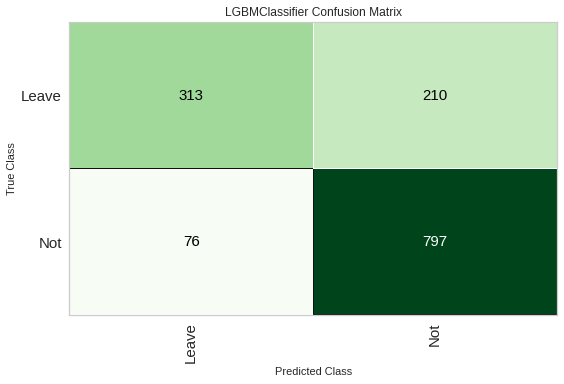

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

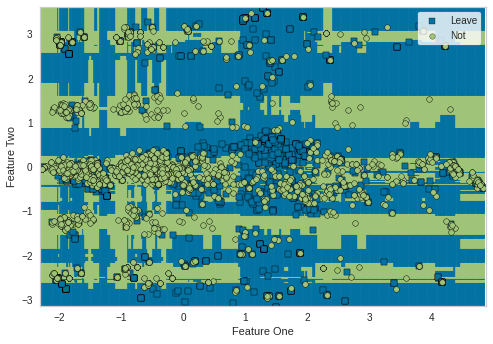

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

# Feature Importance

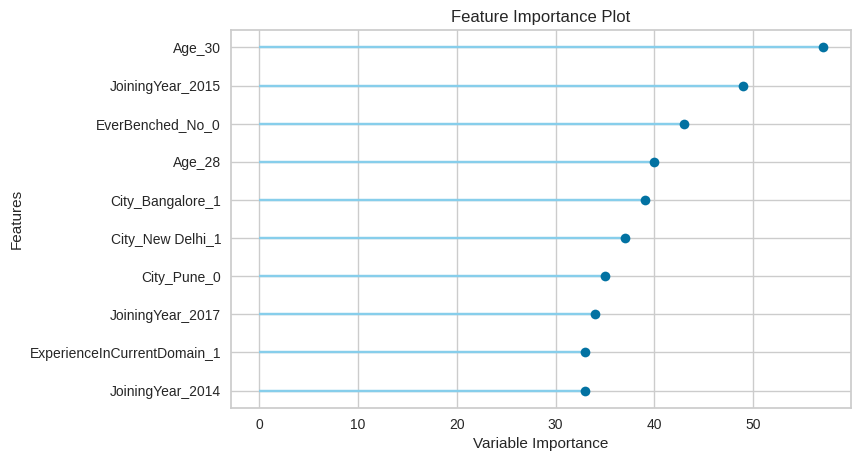

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

In [ ]:
plot_model(tuned_model, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.3
max_depth,-1
min_child_samples,76
min_child_weight,0.001
min_split_gain,0.4
n_estimators,170


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# interpret_model(tuned_model)

## Answers to Model used for Binary Classification
* Is the relationship significant?

-> Yes, features like ... are used for predicting LeaveOrNot

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.

---


* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.

---

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables.

---

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are TAge_30, JoingYear_2015, EverBenched_No_0, Age_28, City_Bnaglore_1, City_New Delhi_1, City_Pune_0, JoingYear_2017, ExperienceInCurrentDomain_1, JoingYear_2014

We have exluded the insignificant ones by setting Remove perfect colinearity, remove multicolinearity and feature selection to True.

---

* Does the model make sense?

-> Yes, the LeaveorNot prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Employee that will Leave.

---

* Does regularization help?

-> Yes regularization decreased the F1 score of the Light GBM model from 0.8787 to 0.8799

---

* Which independent variables are significant?

-> Age_30, JoingYear_2015, EverBenched_No_0, Age_28, City_Bnaglore_1, City_New Delhi_1, City_Pune_0, JoingYear_2017, ExperienceInCurrentDomain_1, JoingYear_2014 like are important

---

* Which hyperparameters are important?

->The number of estimators, Bagging Fraction, Minimum Child Samples, regularization parameters alpha and lambda, etc are important hyperparameters

# Multiclass Classification

In [ ]:
employee_fut.PaymentTier.unique()

array([3, 1, 2])

In [ ]:
print("Distribution of Contract Types:")
print(round(employee_fut['PaymentTier'].value_counts(normalize=True) * 100,2))

Distribution of Contract Types:
3    75.05
2    19.73
1     5.22
Name: PaymentTier, dtype: float64


In [ ]:
clf1 = setup(data = employee_fut, 
             target = 'PaymentTier',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,3634
1,Target,PaymentTier
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='PaymentTier', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='PaymentTier')),
                ('fix_perfect', Remove_100(target='PaymentTier')),
                ('clean_names', Clean_Colum_Names

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8225,0.8469,0.5692,0.8103,0.8126,0.5381,0.5401,1.428
gbc,Gradient Boosting Classifier,0.8192,0.8505,0.5642,0.8048,0.8077,0.5442,0.5492,2.618
rf,Random Forest Classifier,0.8158,0.8377,0.5522,0.7992,0.8066,0.5166,0.5179,0.986
et,Extra Trees Classifier,0.8047,0.8111,0.5515,0.7970,0.8003,0.4977,0.4985,1.002
dt,Decision Tree Classifier,0.7703,0.7407,0.5312,0.7782,0.7737,0.4274,0.4283,0.084
ada,Ada Boost Classifier,0.6481,0.8000,0.5340,0.7835,0.6971,0.3248,0.3536,0.340
knn,K Neighbors Classifier,0.6362,0.7588,0.5348,0.7876,0.6883,0.3182,0.3508,0.518
svm,SVM - Linear Kernel,0.6049,0.0000,0.5462,0.7978,0.6645,0.3072,0.3526,0.204
ridge,Ridge Classifier,0.5889,0.0000,0.5339,0.7965,0.6478,0.2970,0.3476,0.058
lr,Logistic Regression,0.5880,0.8171,0.5372,0.8036,0.6566,0.2957,0.3459,1.214


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3634, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


# Create a Model
We will create a LightGBM model

In [ ]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.8607,0.5527,0.8018,0.8098,0.5320,0.5342
1,0.8160,0.8450,0.5610,0.8038,0.8070,0.5257,0.5276
2,0.8341,0.8454,0.6075,0.8280,0.8285,0.5670,0.5680
3,0.8049,0.8253,0.5423,0.7896,0.7944,0.4933,0.4953
4,0.8341,0.8584,0.5826,0.8280,0.8234,0.5724,0.5756
Mean,0.8225,0.8469,0.5692,0.8103,0.8126,0.5381,0.5401
Std,0.0112,0.0126,0.0233,0.0153,0.0122,0.0290,0.0291


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3634, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8374,0.8615,0.5587,0.8021,0.8189,0.5644,0.5677
1,0.8282,0.8553,0.5663,0.8124,0.8157,0.5561,0.5590
2,0.8387,0.8519,0.5664,0.8088,0.8220,0.5774,0.5811
3,0.8034,0.8287,0.5354,0.7812,0.7903,0.4923,0.4956
4,0.8280,0.8637,0.5655,0.8052,0.8135,0.5611,0.5663
Mean,0.8271,0.8522,0.5585,0.8019,0.8121,0.5502,0.5540
Std,0.0127,0.0125,0.0119,0.0109,0.0113,0.0298,0.0300


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=100, n_jobs=-1, num_leaves=90, objective=None,
               random_state=3634, reg_alpha=0.4, reg_lambda=0.1, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


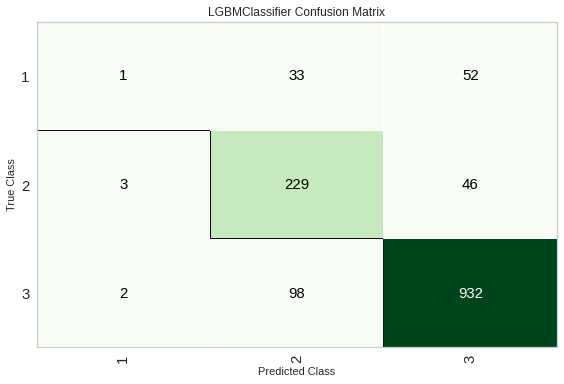

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

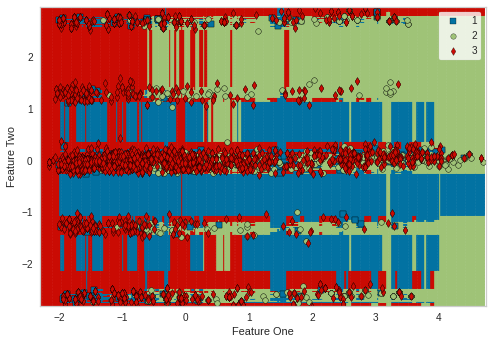

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

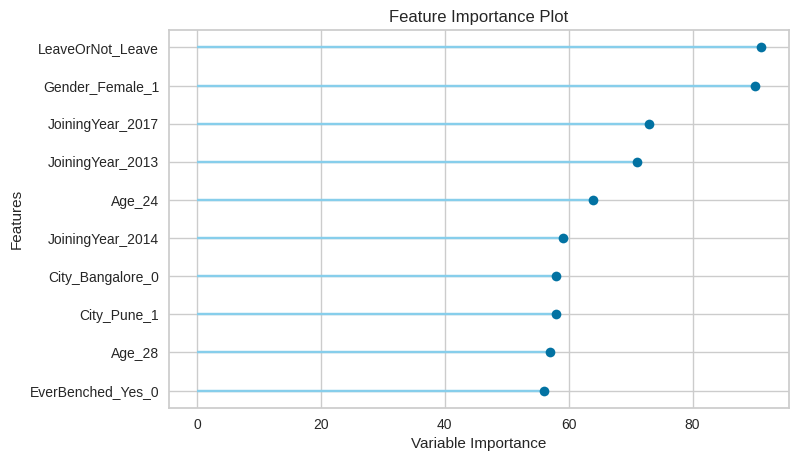

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

## Answers for model used for Multiclass Classification
* Is the relationship significant?

-> Yes, features like ... are used for predicting LeaveOrNot

* Are any model assumptions violated?

-> Assumptions for models like linear regression:
1.   There is a linear relationship
2.   Standardized/Normalized input predictor variables
3.   No or minimal multicolinearity exists among predictor variables
4.   Training size is sufficiently large.

  While Setting up the classifier, we have normalized the predictors, attempted to eliminate multicolinearity, fixed class imbalance, adjust the train test split to avoid any model violations.


* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.

* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most important features are LeaveOrNot_Leave, Gender_Female_1,  Joinig_Year_2017,  Joinig_Year_2013, Joinig_Year_2014, City_Banglore_0, City_Pune_1, Age_28 and EverBenched_Yes_0

* Does the model make sense?

-> Yes, the LeaveOrNot prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Employee that will Leave.

* Does regularization help?

-> No regularization decreased the F1 score of the Light GBM model from 0.8126 to 0.8121.


* Which independent variables are significant?

-> LeaveOrNot_Leave, Gender_Female_1,  Joinig_Year_2017,  Joinig_Year_2013, Joinig_Year_2014, City_Banglore_0, City_Pune_1, Age_28 and EverBenched_Yes_0 like are important

* Which hyperparameters are important?

->The number of estimators, regularization parameters alpha and lambda, etc are important hyperparameters

# Regression

In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data = employee_fut, 
            target = 'Age',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,2118
1,Target,Age
2,Original Data,"(4653, 15)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3722, 25)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='m...
                ('dummy', Dummify(target='Age')),
                ('fix_perfect', Remove_100(target='Age')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough')

In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.6010,23.6808,4.8629,-0.0127,0.1502,0.1144,0.192
lr,Linear Regression,3.6033,23.6808,4.8632,-0.0129,0.1501,0.1145,0.044
lar,Least Angle Regression,3.6025,23.6922,4.8642,-0.0133,0.1502,0.1144,0.028
ridge,Ridge Regression,3.6050,23.7001,4.8649,-0.0136,0.1502,0.1145,0.024
br,Bayesian Ridge,3.6259,23.8933,4.8846,-0.0217,0.1507,0.1151,0.028
omp,Orthogonal Matching Pursuit,3.5859,23.9642,4.8918,-0.0248,0.1510,0.1138,0.026
huber,Huber Regressor,3.4751,24.3600,4.9333,-0.0426,0.1527,0.1093,0.596
ada,AdaBoost Regressor,3.7810,24.3826,4.9342,-0.0427,0.1525,0.1209,0.062
lightgbm,Light Gradient Boosting Machine,3.6764,24.4096,4.9374,-0.0441,0.1529,0.1172,0.198
llar,Lasso Least Angle Regression,3.7128,24.7000,4.9666,-0.0564,0.1534,0.1181,0.024


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7906,25.5437,5.0541,-0.0556,0.1556,0.1192
1,3.5930,23.5686,4.8547,-0.0238,0.1502,0.1146
2,3.6114,23.3961,4.8370,-0.0261,0.1509,0.1173
3,3.4933,22.2840,4.7206,-0.0427,0.1469,0.1122
4,3.8938,27.2557,5.2207,-0.0722,0.1610,0.1225
Mean,3.6764,24.4096,4.9374,-0.0441,0.1529,0.1172
Std,0.1449,1.7686,0.1777,0.0182,0.0049,0.0036


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=2...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

In [ ]:
tuned_model = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7163,24.9255,4.9925,-0.0301,0.1532,0.1165
1,3.5575,23.2075,4.8174,-0.0081,0.1485,0.1130
2,3.5509,22.6616,4.7604,0.0061,0.1482,0.1152
3,3.3907,21.4946,4.6362,-0.0058,0.1434,0.1082
4,3.8600,26.8277,5.1795,-0.0554,0.1592,0.1211
Mean,3.6151,23.8234,4.8772,-0.0186,0.1505,0.1148
Std,0.1600,1.8651,0.1897,0.0218,0.0053,0.0042


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=1.0, bagging_freq=3,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.5,
                                importance_type='split', learning_rate=0.2,
                                max_depth=-1, min_child_samples=11,
                                min_child_weight=0.001, min_split_gain=0.2,
                                n_estimators=50, n_jobs=-1, num_leaves=8,
                                objective=None,
                                power_transformer_method='box...
                                                        importance_type='split',
                                                        learning_rate=0.2,
                                                        max_depth=-1,
                                 

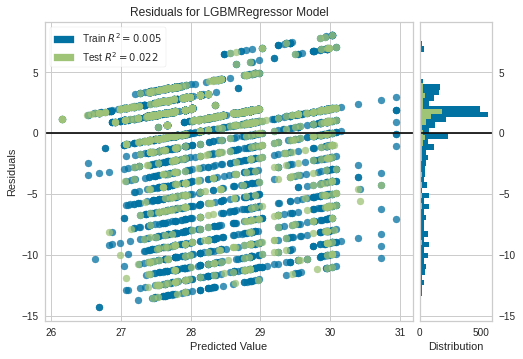

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_model, plot = 'residuals')

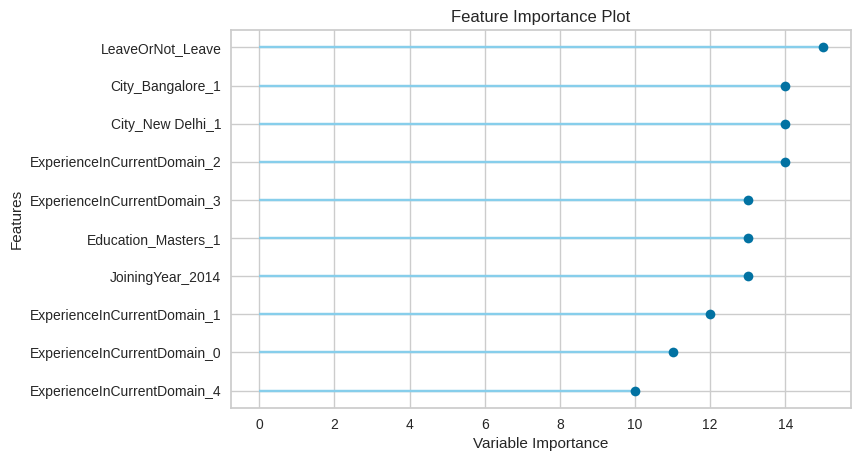

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_model, plot = 'feature')

## Answers for Regression Model
* Is the relationship significant?

-> Yes, the relationship is significant

---

* Are any model assumptions violated?

-> We have used the Pycaret library for the avoiding any model violation
1.   Normalized the numeric predictor variables
2.   Transformed the target variable using Box Cox transformation.
3.   Adjust the train test split to ensure sufficient training and test data size
4.   Use 5 fold cross validation to eliminate any test set bias.
5.   Remove multicolinearity from the model.



---



* Is there any multicollinearity in the model?

-> Yes, multicolinearity exists in the data.



---



* In the multivariate models are predictor variables independent of all the other predictor variables?

-> In the data, predictor variables are depedent on each other.
We use remove_multicolinearity to eliminate the highly corelated predictor variables



---



* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

-> The most significant predictor variables are as follows:
LeaveOrNotLeave, City_Banglore_1, City_New_Delhi_1, ExperienceInCurrentDomain_2, ExperienceInCurrentDomain_3 and Educations_Master_1

->  To eliminate insignificant features from the model we set remove perfect colinearity, remove multicolinearity and feature selection to True while setting up the Pycaret model. 

---

* Does the model make sense?

-> Yes, the LeaveOrNOt prediction model makes sense as it has this accuracy and are able to correctly classify and predictor the Employees that will Leave.


---


* Does regularization help?

-> Yes regularization reduced the mean value.

---


* Which independent variables are significant?

-> LeaveOrNotLeave, City_Banglore_1, City_New_Delhi_1, ExperienceInCurrentDomain_2, ExperienceInCurrentDomain_3, Educations_Master_1, Joining_Year_2014, ExperienceInCurrentDomain_1, ExperienceInCurrentDomain_0, ExperienceInCurrentDomain_4 are important independent variable

---


* Which hyperparameters are important?

->The number of estimators, bagging fraction, bagging frequency, regularization parameters alpha and lambda are important hyperparameters

# Conclusion:
 We have used Pycaret library for implemanting AutoML for EmpLoyee Future Predicition data set. 
 
We have used Employee Data set. We can determine whether and employee will leave a company or not depending on our methods. Above we can conclude our accuray of data set.

We have used binary classification, MultiClass Classification, Regression.

License
References :

https://pycaret.org

https://pycaret.readthedocs.io/en/stable/api/classification.html

Copyright (c) 2022 rahukkodate

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE